<img src="img/dsci572_header.png" width="600">

# Lecture 4: Introduction to Pytorch & Neural Networks



<br><br><br>

## Lecture Learning Objectives


- Describe the difference between `Numpy` and `torch` arrays (`np.array` vs. `torch.Tensor`)
- Explain forward pass in neural networks using vector and matrix notation. 
- Explain fundamental concepts of neural networks such as layers, nodes, activation functions, etc.
- Create a simple neural network in PyTorch for regression or classification

<br><br><br>

## Imports


In [1]:
import sys
import numpy as np
import pandas as pd
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utils.plotting import *

<br><br>

## Recap 

<img src="img/nn-10.png">

Here are the computations in the forward pass

$$h_i^{(1)} = \phi^{(1)} \sum_j w_{ij}^{(1)}x_j + b_i^{(1)} $$ 

$$h_i^{(2)} = \phi^{(2)} \sum_j w_{ij}^{(2)}h_j^{(1)} + b_i^{(2)} $$ 

$$y_i = \sum_j w_{ij}^{(3)}h_j^{(2)} + b_i^{(3)} $$ 


Assume the following dimensionality 

- $\mathbf{X}_{n \times d}$, i.e., each batch has $n$ examples
- $\mathbf{W}^{(l)}_{\text{hidden\_size} \times \text{input\_size}}$, where hidden\_size and input\_size are of the corresponding layer
 
This can be written in vectorized form as:

$$\mathbf{h}^{(1)} = \phi^{(1)} (\mathbf{W}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})$$
$$\mathbf{h}^{(2)} = \phi^{(2)} (\mathbf{W}^{(2)}\mathbf{h}^{(1)} + \mathbf{b}^{(2)})$$
$$\mathbf{y} = (\mathbf{W}^{(3)}\mathbf{h}^{(2)} + \mathbf{b}^{(3)})$$

And in matrix form as: 

$$\mathbf{H}^{(1)} = \phi^{(1)} (\mathbf{X}\mathbf{W}^{(1)\text{T}} + \mathbf{b}^{(1)})$$
$$\mathbf{H}^{(2)} = \phi^{(2)} (\mathbf{H}^{(1)}\mathbf{W}^{(2)\text{T}} + \mathbf{b}^{(2)})$$
$$\mathbf{Y} = (\mathbf{H}^{(2)}\mathbf{W}^{(3)\text{T}} + \mathbf{b}^{(3)})$$

- Assume broadcasting is used to add the bias vector to each row of the matrix.  


<br><br>

### ❓❓ Questions for you

### Exercise 4.1

**iClicker cloud join link: https://join.iclicker.com/SDMQ**

**Select all of the following statements which are TRUE.**

- (A) In a neural network, the number of nodes in the hidden layer must always be greater than the number of input nodes.
- (B) Activation functions in a neural network are used to introduce non-linearity into the network model.
- (C) In regression problems, it is advisable to apply a sigmoid function to the output, similar to other nodes.
- (D) The same activation function must be used for all neurons in a feedforward neural network.
- (E) During the forward pass, the bias in each neuron is added to the weighted sum of inputs before applying the activation function.

```{admonition} V's Solutions!
:class: tip, dropdown
B, E
```

<br><br><br><br>

## Motivation 

So far, our focus has been on optimizing simple linear models using gradient descent.
<br><br>
<img src="img/lr-1param.png">
<br><br>

Here's the overview of this process:
- **Initialization:** Start with an initial set of parameters, often randomly chosen. 
- **Forward pass:** Generate predictions using the current values of the parameters. (E.g., $\hat{y_i} = x_{1}w_1 + Bias$ in the toy example above)
- **Loss calculation:** Evaluate the loss, which quantifies the discrepancy between the model's predictions and the actual target values.
- **Gradient calculation:** Compute the gradient of the loss function with respect to each parameter either on a batch or the full dataset. This gradient indicates the direction in which the loss is increasing and its magnitude.
- **Parameter Update**: Adjust the parameters in the opposite direction of the calculated gradient, scaled by the learning rate. This step aims to reduce the loss by moving the parameters toward values that minimize it.


How can we calculate the gradient of the loss with respect to the parameters in a more complicated network? 

![](img/forward-2.png)

- The parameters of the model are: $w_1$, $w_2$, $w_3$, $w_4$, $b_1$, $b_2$, $b_3$.
- To optimize these parameters, we need to calculate the gradients of the loss function 
$\mathcal{L}$ with respect to each parameter. So we need to calculate $\frac{\partial \mathcal{L}}{\partial w_1}$, $\frac{\partial \mathcal{L}}{\partial w_2}$, $\frac{\partial \mathcal{L}}{\partial w_3}$, $\frac{\partial \mathcal{L}}{\partial w_4}$, $\frac{\partial \mathcal{L}}{\partial b_1}$, $\frac{\partial \mathcal{L}}{\partial b_2}$, and $\frac{\partial \mathcal{L}}{\partial b_3}$ 
- To calculate $\frac{\partial \mathcal{L}}{\partial w_3}$, it's essential to determine  $\frac{\partial \mathcal{L}}{\partial \hat{y}}$ and $\frac{\partial \hat{y}}{\partial w_3}$
- To calculate $\frac{\partial \mathcal{L}}{\partial w_1}$, we need the product of multiple derivatives $\frac{\partial \mathcal{L}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial a_1} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial w_1}$
- As the network becomes more complex, this process of gradient calculation grows increasingly intricate.
- This method of efficiently computing these gradients is known as **backpropagation** or **backprop** for short.
- In our next lecture, we'll delve into a toy example of backpropagation. For the moment, let's focus on how we can leverage PyTorch to automate the gradient computation using backpropagation.

What do we want from a deep learning framework?

- **Automatic Differentiation:** Essential for efficiently computing gradients

- **GPU Support:** To leverage the power of GPUs for faster computation

- **Optimization and Inspection of Computation Graph:** Tools to optimize performance and the ability to inspect or visualize the computation graph for debugging and understanding model behaviour.

There are several popular deep-learning frameworks 
- [PyTorch by Facebook AI](https://pytorch.org/)
- [TensorFlow and Keras by Google](https://www.tensorflow.org/guide/keras)
- [Apache MXNet](https://mxnet.apache.org)
- [Microsoft Cognitive Toolkit (CNTK)](https://learn.microsoft.com/en-us/cognitive-toolkit/getting-started)

[Here](https://datascientest.com/en/pytorch-all-about-this-framework) and [here](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2023/) you will find some resources discussing PyTorch vs. TensorFlow. 

<br><br><br><br>

## Introduction to PyTorch 

### Why PyTorch 

PyTorch is a Python-based tool for scientific computing. Some pros of PyTorch are 

- Python-friendly

- Good documentation and community support
- Open source
- Plenty of projects out there using PyTorch
- Dynamic graphs

In general, PyTorch does two main things:

- Provides an n-dimensional array object similar to that of `Numpy`, with the difference that it can be manipulated using GPUs

- Computes gradients (through automatic differentiation)

<br><br><br>

### PyTorch's Tensor


- In PyTorch a tensor is just like NumPy's `ndarray` that we have become so familiar with.

- A key difference between PyTorch's `torch.Tensor` and Numpy's `np.array` is that `torch.Tensor` was constructed to integrate with GPUs and PyTorch's computational graphs

### `ndarray` vs `tensor`

- Creating and working with tensors is much the same as with Numpy `ndarrays`

- You can create a tensor with `torch.tensor()` in various ways:

In [2]:
a = torch.tensor([1, 2, 3.])

In [3]:
b = torch.tensor([1, 2, 3])

Let's see the datatype of each tensor:

In [4]:
for _ in [a, b]:
    print(f"{_}, dtype: {_.dtype}")

tensor([1., 2., 3.]), dtype: torch.float32
tensor([1, 2, 3]), dtype: torch.int64


<br><br><br>

- PyTorch comes with most of the `Numpy` functions we're already familiar with:

In [5]:
torch.zeros(2, 2)  # zeroes

tensor([[0., 0.],
        [0., 0.]])

In [6]:
torch.ones(2, 2)  # ones

tensor([[1., 1.],
        [1., 1.]])

In [7]:
torch.randn(3, 2)  # random normal

tensor([[1.8997, 1.0120],
        [2.1575, 0.0030],
        [0.4814, 0.5747]])

In [8]:
torch.rand(2, 3, 2)  # rand uniform

tensor([[[0.2680, 0.2180],
         [0.3072, 0.5915],
         [0.2767, 0.5373]],

        [[0.5747, 0.6681],
         [0.5309, 0.2118],
         [0.9216, 0.2615]]])

- Just like in NumPy we can look at the shape of a tensor with the `.shape` attribute:

In [9]:
x = torch.rand(2, 3, 2, 2)
x.shape

torch.Size([2, 3, 2, 2])

In [10]:
x.ndim

4

<br><br><br>

### Tensors and Data Types

- Different dtypes have different memory and computational implications (see the end of [Lecture 1](lecture1_floating-point.ipynb))

- In Pytorch we'll be building networks that require thousands, millions, or even billions of floating point calculations
- In such cases, using a smaller dtype like `float32` can significantly speed up computations and reduce memory requirements
- The **default float dtype in Pytorch is `float32`**, as opposed to Numpy's `float64`
- In fact some operations in Pytorch will even throw an error if you pass a high-memory `dtype`

In [11]:
torch.tensor([1., 2]).dtype

torch.float32

In [12]:
print(np.array([3.14159]).dtype)
print(torch.tensor([3.14159]).dtype)

float64
torch.float32


- But just like in Numpy, you can always specify the particular dtype you want using the `dtype` argument:

In [13]:
print(torch.tensor([3.14159], dtype=torch.float64).dtype)

torch.float64


<br><br><br>

### Operations on Tensors

- Tensors operate just like `ndarrays` and have a variety of familiar methods that can be called off them:

In [14]:
a = torch.rand(1, 3)
b = torch.rand(3, 1)

In [15]:
a

tensor([[0.4468, 0.7256, 0.8924]])

In [16]:
b

tensor([[0.3614],
        [0.0401],
        [0.7075]])

In [17]:
a + b  # broadcasting betweean a 1 x 3 and 3 x 1 tensor

tensor([[0.8082, 1.0870, 1.2538],
        [0.4869, 0.7657, 0.9325],
        [1.1543, 1.4331, 1.5999]])

In [18]:
a * b  # element-wise multiplication

tensor([[0.1615, 0.2622, 0.3225],
        [0.0179, 0.0291, 0.0358],
        [0.3161, 0.5133, 0.6314]])

In [19]:
a @ b # matrix multiplication

tensor([[0.8220]])

In [20]:
a.mean()

tensor(0.6883)

In [21]:
a.sum()

tensor(2.0648)

<br><br><br>

### Indexing

- Once again, same as Numpy

In [22]:
X = torch.rand(5, 2)
print(X)

tensor([[0.9481, 0.4814],
        [0.1812, 0.2266],
        [0.7852, 0.2173],
        [0.9007, 0.3288],
        [0.9303, 0.6866]])


In [23]:
print(X[0, :]) 
print(X[0])
print(X[:, 0])

tensor([0.9481, 0.4814])
tensor([0.9481, 0.4814])
tensor([0.9481, 0.1812, 0.7852, 0.9007, 0.9303])


<br><br><br>

### Numpy Bridge

- Sometimes we might want to convert a tensor back to a NumPy array

- We can do that using the `.Numpy()` method

In [24]:
X = torch.rand(3,3)
print(type(X))
X_numpy = X.numpy()
print(type(X_numpy))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


<br><br><br>

### Using GPU with PyTorch

- GPU is a graphical processing unit (as opposed to a CPU: central processing unit)

- GPUs were originally developed for gaming. They are very fast at performing operations on large amounts of data by performing them in parallel (think about updating the value of all pixels on a screen very quickly as a player moves around in a game)

- More recently, GPUs have been adapted for more general purpose programming

- Neural networks can typically be broken into smaller computations that can be performed in parallel on a GPU

- PyTorch is tightly integrated with [CUDA](https://en.wikipedia.org/wiki/CUDA) (Compute Unified Device Architecture), a software layer developed by Nvidia that facilitates interactions with an Nvidia GPU (if you have one)

- You can check if you have a CUDA GPU:

In [25]:
torch.cuda.is_available()

False

- In May 2022, PyTorch also announced GPU-accelerated PyTorch training on Mac (see [here](https://pytorch.org/blog/introducing-accelerated-pytorch-training-on-mac/)) using [Apple’s Metal Performance Shaders (MPS)](https://developer.apple.com/metal/).

- If you're using a Mac equipped with **Apple silicon** (M1 or M2), you can benefit from its GPU cores to train your PyTorch models:

In [26]:
torch.backends.mps.is_available()

True

- When training on a machine that has a GPU, you need to tell PyTorch you want to use it

- You'll see the following at the top of most PyTorch code:

In [27]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps


- You can then use the `device` argument when creating tensors to specify whether you wish to use a CPU or GPU

- Or if you want to move a tensor between the CPU and GPU, you can use the `.to()` method:

In [28]:
X = torch.rand(2, 2, 2, device=device)
X.device

device(type='mps', index=0)

In [29]:
X.to('cpu')

tensor([[[0.3323, 0.7243],
         [0.6192, 0.2969]],

        [[0.3759, 0.5648],
         [0.6352, 0.6709]]])

In [30]:
X.device

device(type='mps', index=0)

In [ ]:
# X.to('cuda')  # will give me an error as I don't have a CUDA GPU

<br><br><br>

#### Gradient computation

We'll learn in the next lecture that the process of using the chain rule in a backward manner (from the last computation back to its root at the variable) is called **back-propagation**. For now, let's just learn how we make PyTorch compute the gradient for us using back-propagation.

PyTorch provides a `.backward()` method on every tensor that takes part in gradient computation. This enables us to **do gradient descent without worrying about the structure of our model**, since we no longer need to compute the derivative ourselves.

At a high-level, the idea is that the loss function is a series of elementary computations performed on the weight parameters, along with some constant data points and biases. So if we track computations that involve the weights all the way to the loss function, we can compute the gradient of the loss function using back-propagation w.r.t to the weights. More on this in the next lecture. 

<br><br><br>

If we now define `w` using PyTorch tensors, we can use `.backward()` on our loss function to compute the derivative w.r.t to `w`:

In [31]:
X = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)
w = torch.tensor([1.0], requires_grad=True)  # Random initial weight
y = torch.tensor([2.0, 4.0, 6.0], requires_grad=False)  # Target values
mse = ((X * w - y)**2).mean()
mse.backward()
w.grad

tensor([-9.3333])

In [32]:
X@(X*w - y) * (2/3)

tensor(-9.3333, grad_fn=<MulBackward0>)

<br><br><br>

<br><br><br>

### Simple Linear Regression with PyTorch 

- Let's create a simple regression dataset with 500 observations:

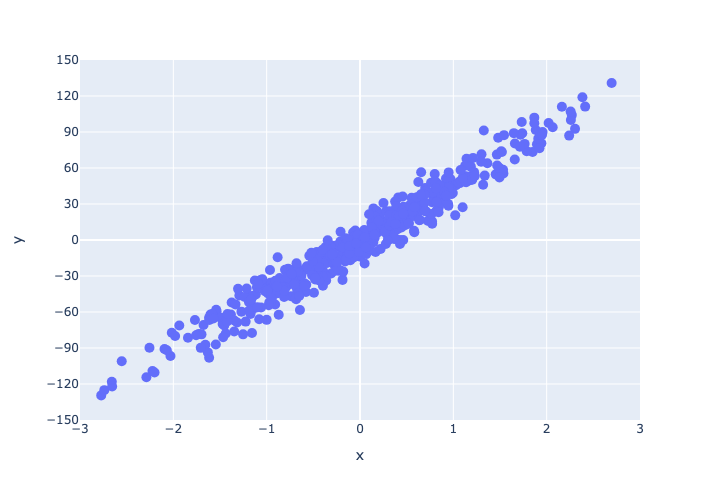

In [33]:
X, y = make_regression(n_samples=500, n_features=1, random_state=0, noise=10.0)
plot_regression(X, y)

- We know how to fit a simple linear regression to this data using sklearn:

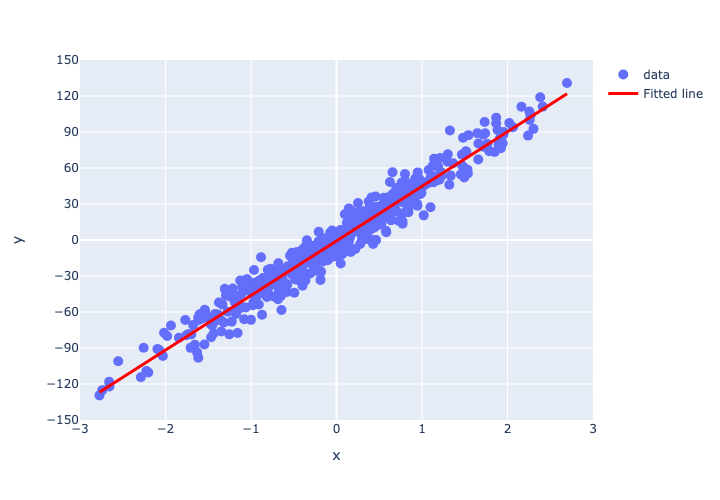

In [34]:
sk_model = LinearRegression().fit(X, y)
plot_regression(X, y, sk_model.predict(X))

- Here are the parameters of that fitted line:

In [35]:
print(f"w_0: {sk_model.intercept_:.2f} (bias/intercept)")
print(f"w_1: {sk_model.coef_[0]:.2f}")

w_0: -0.77 (bias/intercept)
w_1: 45.50


- As an equation, that looks like this:

$$\hat{y}=-0.77 + 45.50x$$

- Or in matrix form:

$$\begin{bmatrix} \hat{y_1} \\ \hat{y_2} \\ \vdots \\ \hat{y_n} \end{bmatrix}=\begin{bmatrix} 1 & x_{11} \\ 1 & x_{21} \\ \vdots & \vdots \\ 1 & x_{n1} \end{bmatrix} \begin{bmatrix} -0.77 \\ 45.55 \end{bmatrix}$$

- Or in graph form I'll represent it like this: 

<img src="img/nn-1.png">

<br><br><br>

### Linear Regression with a Neural Network in PyTorch

- So let's implement the above in PyTorch to start gaining an intuition about neural networks

- Every neural network model you build in PyTorch has to inherit from `torch.nn.Module`

- Remember class inheritance from DSCI 511? Inheritance allows us to inherit commonly needed functionality without having to write code ourselves

- Think about sklearn models: they all inherit common methods like `.fit()`, `.predict()`, `.score()`, etc. When creating a neural network, we define our own architecture but still want common functionality which we inherit from `torch.nn.Module`.

- Let's create a model called `linearRegression` and then I'll talk you through the syntax:

In [36]:
class linearRegression(nn.Module):  # our class inherits from nn.Module and we can call it anything we like
    
    def __init__(self, input_size, output_size):
        super().__init__()  # super().__init__() makes our class inherit everything from torch.nn.Module
        
        self.linear = nn.Linear(input_size, output_size,)  # this is a simple linear layer: wX + b

    def forward(self, x):
        out = self.linear(x)
        return out

Let's step through the above:

```python
class linearRegression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__() 
```

<br><br><br>

Here we're creating a class called `linearRegression` and inheriting the methods and attributes of `nn.Module`

(hint: try typing `help(linearRegression)` to see all the things we inherited from `nn.Module`).

```python
        self.linear = nn.Linear(input_size, output_size)
```

<br><br><br>

Here we're defining a "Linear" layer, which just means `wX + b`, i.e., the weights of the network, multiplied by the inputs plus the bias.

```python
    def forward(self, x):
        out = self.linear(x)
        return out
```

PyTorch networks created with `nn.Module` must have a `forward()` method. It accepts the input data `x` and passes it through the defined operations. In this case, we are passing `x` into our linear layer and getting an output `out`.

<br><br><br>

- After defining the model class, we can create an instance of that class:

In [37]:
model = linearRegression(input_size=1, output_size=1)

<img src="img/lr-1param.png">

- We can check out our model using `print()`:

In [38]:
print(model)

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


- Or the more useful `summary()` (which we imported at the top of this notebook with `from torchsummary import summary`):

In [39]:
summary(model);

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0


- Notice how we have two parameters? We have one for the weight (`w1`) and one for the bias (`w0`)

- These were initialized **randomly** by PyTorch when we created our model. They can be accessed with `model.state_dict()`:

In [40]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.5992]])),
             ('linear.bias', tensor([0.3629]))])

<br><br><br>

- Our `X` and `y` data are currently Numpy arrays but they need to be PyTorch tensors

- Let's convert them:

In [41]:
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

In [42]:
X_t.shape

torch.Size([500, 1])

<br><br><br>

- We have a working model right now and could tell it to give us some output with this syntax:

In [43]:
model(X_t[0])

tensor([-0.0088], grad_fn=<ViewBackward0>)

That's just a raw prediction, and far from the actual value of:

In [44]:
y_t[0]

tensor(31.0760)

It's because our model is not trained yet.

What does training mean? In the context of what we've learned so far, it means that we haven't yet done an SGD run to find optimal weights.

- As we learned in the past few lectures, to fit our model we need:

    1. **a loss function** (called "`criterion`" in PyTorch) to tell us how good/bad our predictions are. We'll use mean squared error, `torch.nn.MSELoss()`. See the list of different loss functions in PyTorch [here](https://pytorch.org/docs/stable/nn.html#loss-functions).
    
    2. **an optimization algorithm** to help optimize model parameters. We'll use SGD, `torch.optim.SGD()`. See the list of different optimization algorithms in PyTorch [here](https://pytorch.org/docs/stable/optim.html#module-torch.optim).

In [45]:
LEARNING_RATE = 0.02
criterion = nn.MSELoss()  # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm is SGD

- Before we train I'm going to create a **data loader** to help batch my data

- We'll talk more about these in the next lecture and in lab but they are just generators that yield data to us on request (remember generators from 511?)
- We'll use a `BATCH_SIZE=50` (which should give us 10 batches because we have 500 data points)

In [46]:
BATCH_SIZE = 50
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
dataloader

- We should have 10 batches:

In [47]:
len(dataloader)

10

- We can look at a batch using this syntax:

In [48]:
XX, yy = next(iter(dataloader))

In [49]:
print(f"Shape of feature data (X) in batch: {XX.shape}")
print(f"Shape of response data (y) in batch: {yy.shape}")

Shape of feature data (X) in batch: torch.Size([50, 1])
Shape of response data (y) in batch: torch.Size([50])


<br><br><br>

Let's write code for doing a typical SGD with 10 epochs, but using automatic differentiation of PyTorch:

In [50]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    """Simple training wrapper for PyTorch network."""
    
    for epoch in range(epochs):
        losses = 0
        
        for X, y in dataloader:
            
            optimizer.zero_grad()       # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()  # Forward pass to get output
            loss = criterion(y_hat, y)  # Calculate loss
            loss.backward()             # Getting gradients w.r.t. parameters            
            optimizer.step()            # Update parameters
            losses += loss.item()       # Add loss for this batch to running total
            
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

<br><br><br>

OK, before starting the training, here are the model parameters before training for reference:

In [51]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.5992]])),
             ('linear.bias', tensor([0.3629]))])

<br><br><br>

In [52]:
trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)

epoch: 1, loss: 1605.3570
epoch: 2, loss: 761.9284
epoch: 3, loss: 388.5623
epoch: 4, loss: 223.8161
epoch: 5, loss: 150.9839
epoch: 6, loss: 118.7456
epoch: 7, loss: 104.6407
epoch: 8, loss: 98.3328
epoch: 9, loss: 95.5826
epoch: 10, loss: 94.2573
epoch: 11, loss: 93.6553
epoch: 12, loss: 93.4954
epoch: 13, loss: 93.3343
epoch: 14, loss: 93.2294
epoch: 15, loss: 93.2715
epoch: 16, loss: 93.2655
epoch: 17, loss: 93.2380
epoch: 18, loss: 93.2626
epoch: 19, loss: 93.2288
epoch: 20, loss: 93.2521
epoch: 21, loss: 93.1968
epoch: 22, loss: 93.1848
epoch: 23, loss: 93.2476
epoch: 24, loss: 93.2176
epoch: 25, loss: 93.2668
epoch: 26, loss: 93.2298
epoch: 27, loss: 93.2566
epoch: 28, loss: 93.1772
epoch: 29, loss: 93.1790
epoch: 30, loss: 93.2271


<br><br><br>

- Now our model has been trained, our parameters should be different than before:

In [53]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[45.4766]])),
             ('linear.bias', tensor([-0.7801]))])

- Comparing to our sklearn model, we get the same answer:

In [54]:
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'].item()]},
             index=['sklearn', 'pytorch']).round(2)

w0     w1
sklearn -0.77  45.50
pytorch -0.78  45.48

- We got pretty close

- We could do better by changing the number of epochs or the learning rate
- So here is our simple network once again:

<img src="img/nn-2.png">

- By the way, check out what happens if we run `trainer()` again:

In [55]:
trainer(model, criterion, optimizer, dataloader, epochs=20, verbose=True)

epoch: 1, loss: 93.2117
epoch: 2, loss: 93.2192
epoch: 3, loss: 93.1887
epoch: 4, loss: 93.2269
epoch: 5, loss: 93.2315
epoch: 6, loss: 93.2525
epoch: 7, loss: 93.2043
epoch: 8, loss: 93.4406
epoch: 9, loss: 93.1867
epoch: 10, loss: 93.1621
epoch: 11, loss: 93.2069
epoch: 12, loss: 93.1944
epoch: 13, loss: 93.1991
epoch: 14, loss: 93.2780
epoch: 15, loss: 93.1970
epoch: 16, loss: 93.2119
epoch: 17, loss: 93.2614
epoch: 18, loss: 93.2437
epoch: 19, loss: 93.2569
epoch: 20, loss: 93.1965


- **Our model continues where we left off**

- This may or may not be what you want. We can start from scratch by re-making the `model` and `optimizer`.

In [56]:
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'].item()]},
             index=['sklearn', 'pytorch']).round(2)

w0     w1
sklearn -0.77  45.50
pytorch -0.76  45.49

<br><br><br>

### Multiple Linear Regression with a Neural Network

- Okay, let's do a multiple linear regression now with 3 features

- So our network will look like this:

<img src="img/nn-3.png">

<br><br><br>

- Let's go ahead and create some data:

In [57]:
# Create dataset
X, y = make_regression(n_samples=500, n_features=3, random_state=0, noise=10.0)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

- And let's create the above model:

In [58]:
X_t.shape

torch.Size([500, 3])

In [59]:
model = linearRegression(input_size=3, output_size=1)

- We should now have 4 parameters (3 weights and 1 bias)

In [60]:
summary(model, (3,));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1]                   4
Total params: 4
Trainable params: 4
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


- Looks good to me! Let's train the model and then compare it to sklearn's `LinearRegression()`:

In [61]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.4625,  0.0971, -0.5414]])),
             ('linear.bias', tensor([-0.1841]))])

In [62]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
trainer(model, criterion, optimizer, dataloader, epochs=100, verbose=False)

In [63]:
sk_model = LinearRegression().fit(X, y)
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'][0, 0].item()],
              "w2": [sk_model.coef_[1], model.state_dict()['linear.weight'][0, 1].item()],
              "w3": [sk_model.coef_[2], model.state_dict()['linear.weight'][0, 2].item()]},
             index=['sklearn', 'pytorch']).round(2)

w0    w1     w2     w3
sklearn  0.43  0.62  55.99  11.14
pytorch  0.37  0.59  56.00  11.19

<br><br><br>

### Non-linear Regression with a Neural Network

- Okay so we can make a simple network to imitate simple and multiple *linear* regression

- For example, what happens when we have more complicated datasets like this?

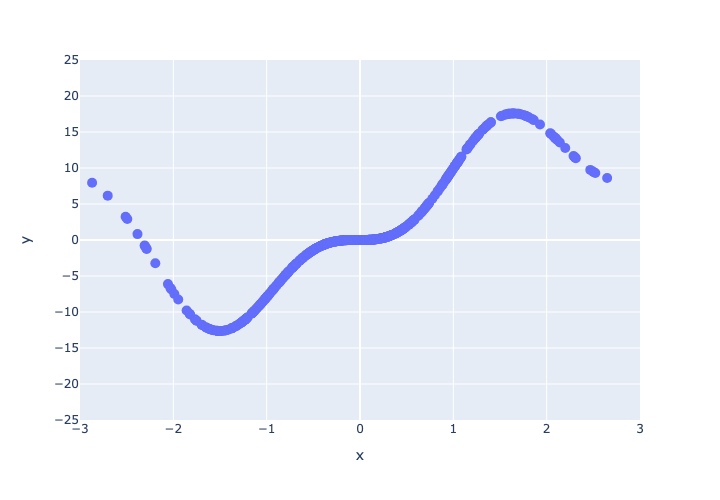

In [64]:
# Create dataset
np.random.seed(2020)

X = np.sort(np.random.randn(500))
y = X ** 2 + 15 * np.sin(X) **3

X_t = torch.tensor(X[:, None], dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

plot_regression(X, y, y_range=[-25, 25], dy=5)

- This is obviously non-linear, and we need to introduce some **non-linearities** into our network

- These non-linearities are what make neural networks so powerful and they are called **"activation functions"**
- We are going to create a new model class that includes a non-linearity, that is, a sigmoid function:

$$S(x)=\frac{1}{1+e^{-x}}$$

- We'll talk more about activation functions later, but note how the sigmoid function non-linearly maps `x` to a value between 0 and 1

- Okay, so let's create the following network:

In [65]:
X_t.shape

torch.Size([500, 1])

<img src="img/nn-5.png">

- All this means is that the value of each node in the hidden layer will be transformed by the "activation function", thus introducing non-linear elements to our model

- There's **two main ways** of creating the above model in PyTorch, I'll show you both:

In [66]:
class nonlinRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden(x)       # input -> hidden layer
        x = self.sigmoid(x)      # sigmoid activation function in hidden layer
        x = self.output(x)       # hidden -> output layer
        return x

- Note how our `forward()` method now passes `x` through the `nn.Sigmoid()` function after the hidden layer

- The above method is very clear and flexible, but I prefer using `nn.Sequential()` to combine my layers together in the constructor:

In [68]:
class nonlinRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.main = torch.nn.Sequential(
            nn.Linear(input_size, hidden_size),  # input -> hidden layer
            nn.Sigmoid(),                        # sigmoid activation function in hidden layer
            nn.Linear(hidden_size, output_size)  # hidden -> output layer
        )

    def forward(self, x):
        x = self.main(x)
        return x

- Let's make an instance of our new class and confirm it has 10 parameters (6 weights + 4 biases):

In [69]:
model = nonlinRegression(1, 3, 1)
summary(model, (1,));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 3]                   6
|    └─Sigmoid: 2-2                      [-1, 3]                   --
|    └─Linear: 2-3                       [-1, 1]                   4
Total params: 10
Trainable params: 10
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


- Okay, let's train:

In [70]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

trainer(model, criterion, optimizer, dataloader, epochs=1000, verbose=False)

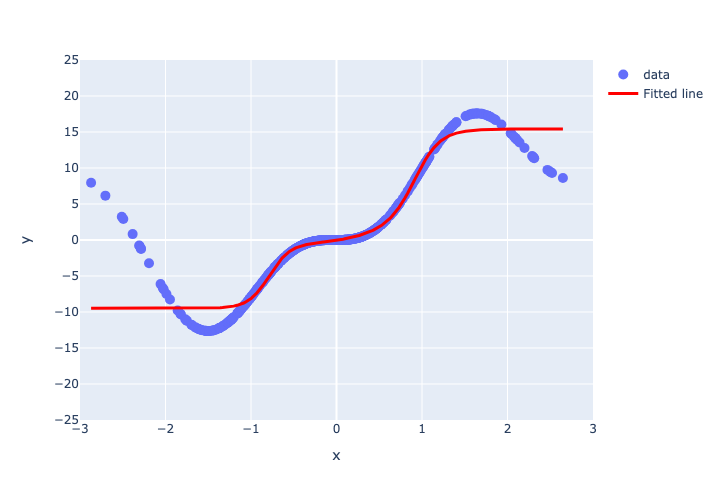

In [71]:
y_p = model(X_t).detach().numpy().squeeze()
plot_regression(X, y, y_p, y_range=[-25, 25], dy=5)

- Take a look at those non-linear predictions

- Our model is not great and we could make it better soon by adjusting the learning rate, the number of nodes, and the number of epochs

- I want you to see how **each of our hidden nodes is engineering a non-linear feature** to be used for the predictions, check it out:

In [ ]:
plot_nodes(X, y_p, model)

### Deep Learning

You've probably heard the magic term **"deep learning"** and you're about to find out what it means

- **Deep neural network: a neural network with more than 1 hidden layer**

- On the other hand, a neural network with only 1 hidden layer is called a **shallow neural network**.

I like to think of each layer as a "feature engineer", it is trying to extract information from the layer before it

<br><br><br>

- Let's create a "deep" network of 2 layers:

<img src="img/nn-6.png" width=500>

In [74]:
class deepRegression(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size_1),
            nn.Sigmoid(),
            nn.Linear(hidden_size_1, hidden_size_2),
            nn.Sigmoid(),
            nn.Linear(hidden_size_2, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

In [75]:
model = deepRegression(1, 5, 3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

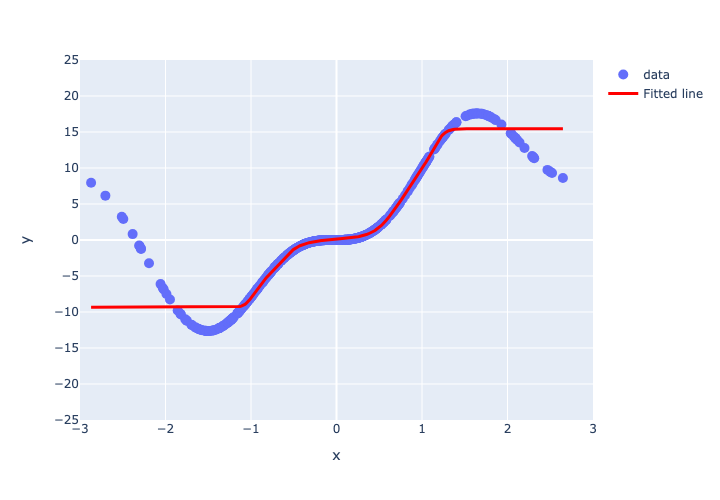

In [77]:
trainer(model, criterion, optimizer, dataloader, epochs=10**3, verbose=False)
plot_regression(X, y, model(X_t).detach(), y_range=[-25, 25], dy=5)

The neural network is doing a good job, but it's still struggling to handle data points near the boundaries, but we can do better by having more neurons in our network:

In [78]:
model = deepRegression(1, 10, 10, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

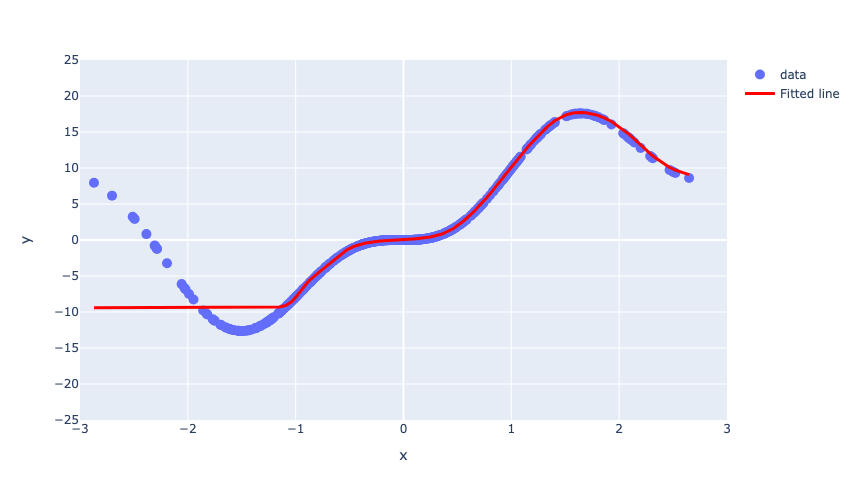

In [79]:
trainer(model, criterion, optimizer, dataloader, epochs=10**3, verbose=False)
plot_regression(X, y, model(X_t).detach(), y_range=[-25, 25], dy=5)

## Activation Functions


- Activation functions are what allow us to model complex, non-linear functions

- There are **many** different activations functions:

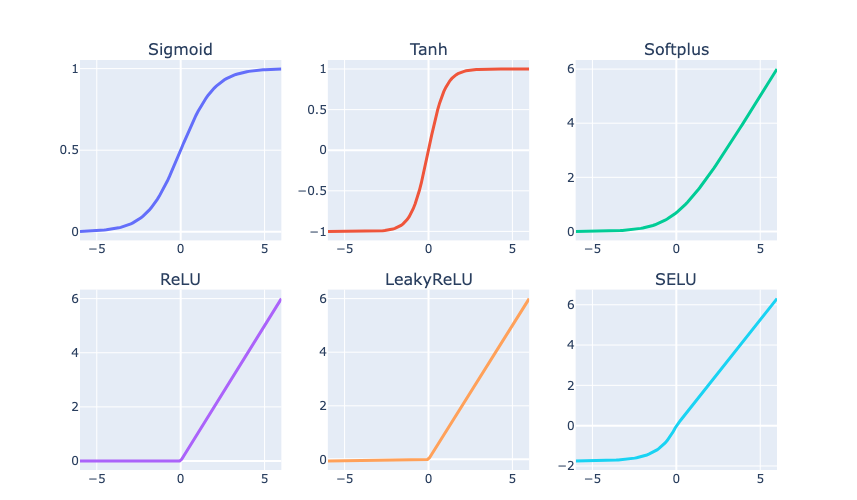

In [80]:
functions = [torch.nn.Sigmoid, torch.nn.Tanh, torch.nn.Softplus, torch.nn.ReLU, torch.nn.LeakyReLU, torch.nn.SELU]
plot_activations(torch.linspace(-6, 6, 100), functions)

- Activation functions should be non-linear and tend to be monotonic and continuously differentiable (smooth)

- But as you can see with the ReLU function above, that's not always the case

- I wanted to point this out because it highlights how much of an art deep learning really is.
- Here's a great quote from [Yoshua Bengio](https://en.wikipedia.org/wiki/Yoshua_Bengio) (famous for his work in AI and deep learning) on his group experimenting with ReLU:

>"_...one of the biggest mistakes I made was to think, like everyone else in the 90s, that you needed smooth non-linearities in order for backpropagation to work. I thought that if we had something like rectifying non-linearities, where you have a flat part, it would be really hard to train, because the derivative would be zero in so many places. And when we started experimenting with ReLU, with deep nets around 2010, I was obsessed with the idea that, we should be careful about whether neurons won't saturate too much on the zero part. **But in the end, it turned out that, actually, the ReLU was working a lot better than the sigmoids and tanh, and that was a big surprise**...it turned out to work better, whereas I thought it would be harder to train!_"

- Anyway, TL;DR **ReLU is probably the most popular these days for training deep neural nets**, but you can treat activation functions as hyper-parameters to be optimized

<br><br><br>

## Neural Network Classification


### Binary Classification

- This will actually be the easiest part of the lecture

- Up until now, we've been looking at developing networks for regression tasks, but what if we want to do binary classification?

- Well, what did we do in Logistic Regression? We just passed the output of a regression into the Sigmoid Function to get a value between 0 and 1 (a probability of an observation belonging to the positive class). Let's do the same thing here

- Let's create a toy dataset first:

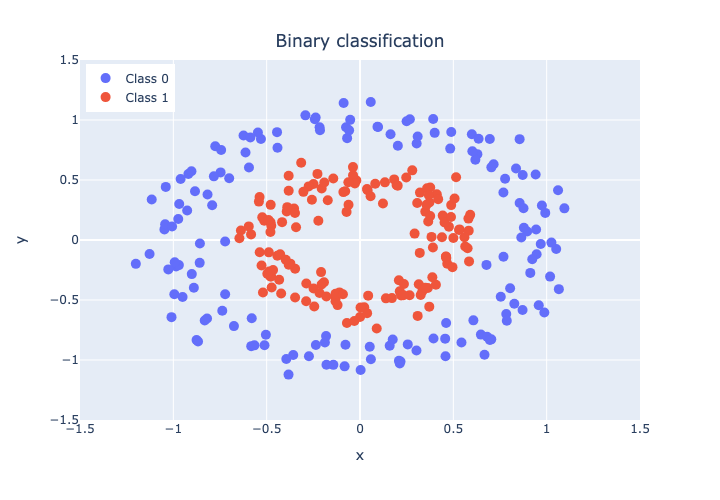

In [81]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)
plot_classification_2d(X, y)

In [82]:
LEARNING_RATE = 0.1
BATCH_SIZE = 50

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

- Let's create this network to model that dataset:

<img src="img/nn-7.png">

<br><br><br>

- I'm going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice.

- We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$\mathcal{L}(w) = \sum_{x,y \in D} -y \log(\hat{y}) - (1-y)\log(1-\hat{y})$$

- In PyTorch, binary cross entropy loss criterion is `torch.nn.BCELoss`

- The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [ ]:
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()  # <-- this will squash our output to a probability between 0 and 1
        )

    def forward(self, x):
        out = self.main(x)
        return out

- **BUT WAIT!**

- While we can do the above and then train with a `torch.nn.BCELoss` loss function, there's a better way

- We can omit the Sigmoid function and just use `torch.nn.BCEWithLogitsLoss` (which combines a Sigmoid layer and the BCELoss)

- Why would we do this? It's numerically more stable (Did you do the log-sum-exp question in Lab 1? We use it here for stability)

- From the docs:
>"*This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.*"

- So actually, here's our model (no Sigmoid layer at the end because it's included in the loss function we'll use):

In [83]:
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

- Let's train the model:

In [84]:
model = binaryClassifier(2, 5, 1)
criterion = torch.nn.BCEWithLogitsLoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm
trainer(model, criterion, optimizer, dataloader, epochs=20, verbose=True)

epoch: 1, loss: 0.6711
epoch: 2, loss: 0.5933
epoch: 3, loss: 0.4854
epoch: 4, loss: 0.3747
epoch: 5, loss: 0.2821
epoch: 6, loss: 0.2012
epoch: 7, loss: 0.1523
epoch: 8, loss: 0.1164
epoch: 9, loss: 0.0941
epoch: 10, loss: 0.0826
epoch: 11, loss: 0.0790
epoch: 12, loss: 0.0775
epoch: 13, loss: 0.0747
epoch: 14, loss: 0.0520
epoch: 15, loss: 0.0470
epoch: 16, loss: 0.0425
epoch: 17, loss: 0.0420
epoch: 18, loss: 0.0366
epoch: 19, loss: 0.0365
epoch: 20, loss: 0.0352


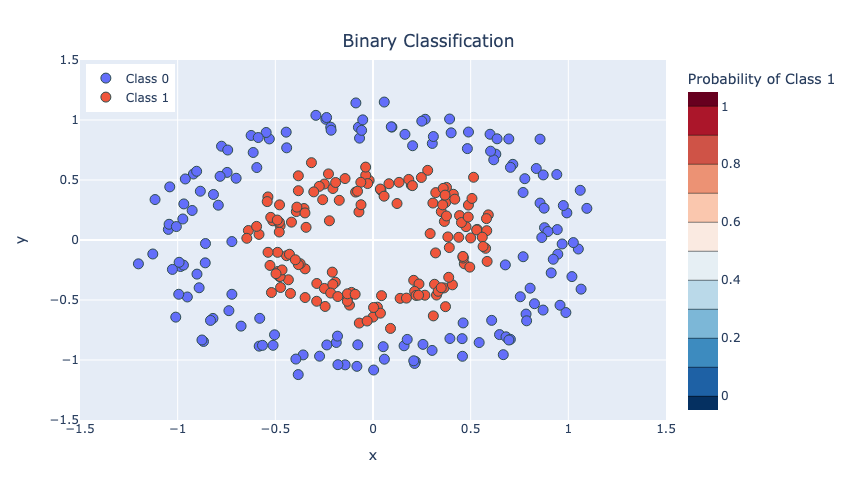

In [85]:
plot_classification_2d(X, y, model)

- To be clear, our model is just outputting **logits**, which are some number between -∞ and +∞ (we aren't applying Sigmoid), so:

    - To get the probabilities we would need to pass them through a Sigmoid;

    - To get classes, we can apply some threshold (usually 0.5)
    
- For example, we would expect the point `(0, 0)` to have a high probability and the point `(-1,-1)` to have a low probability:

In [86]:
prediction = model(torch.tensor([[0, 0], [-1, -1]], dtype=torch.float32)).detach()
print(prediction)

tensor([[ 14.7807],
        [-12.2642]])


In [87]:
probability = nn.Sigmoid()(prediction)
print(probability)

tensor([[1.0000e+00],
        [4.7176e-06]])


In [88]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]
 [0]]


<br><br><br>

### Multiclass Classification

- For multiclass classification, remember softmax?

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

- It basically makes sure all the outputs are probabilities between 0 and 1, and that they all sum to 1.

- `torch.nn.CrossEntropyLoss` is a loss that combines a Softmax with cross entropy loss.

- Let's try a 4-class classification problem using the following network:

<img src="img/nn-8.png">

In [89]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

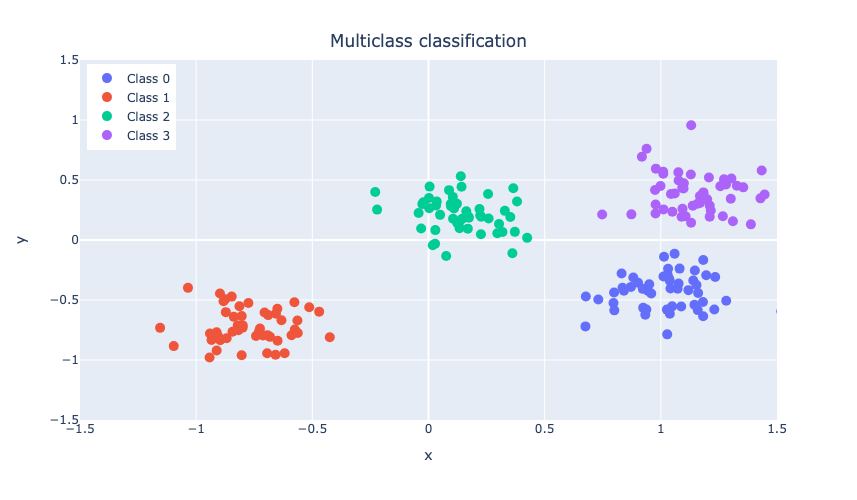

In [90]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.int64)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

plot_classification_2d(X, y, title="Multiclass classification")

- Let's train this model:

In [91]:
model = multiClassifier(2, 5, 4)
criterion = torch.nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)  # optimization algorithm

for epoch in range(10):
    losses = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()       # Clear gradients w.r.t. parameters
        y_hat = model(X_batch)            # Forward pass to get output
        loss = criterion(y_hat, y_batch)  # Calculate loss
        loss.backward()             # Getting gradients w.r.t. parameters
        optimizer.step()            # Update parameters
        losses += loss.item()       # Add loss for this batch to running total
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

epoch: 1, loss: 1.0685
epoch: 2, loss: 0.4708
epoch: 3, loss: 0.1704
epoch: 4, loss: 0.0638
epoch: 5, loss: 0.0239
epoch: 6, loss: 0.0105
epoch: 7, loss: 0.0046
epoch: 8, loss: 0.0030
epoch: 9, loss: 0.0020
epoch: 10, loss: 0.0015


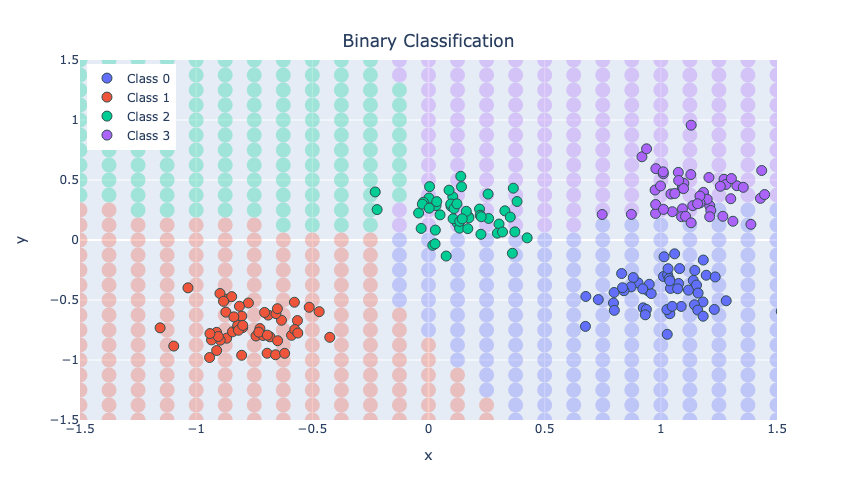

In [92]:
plot_classification_2d(X, y, model, transform="Softmax", title='Multiclass Classification')

- To be clear once again, our model is just outputting logits, which are some numbers between -∞ and +∞, so:

    - To get the probabilities we would need to pass them to a Softmax;

    - To get classes, we need to select the largest probability.
    
- For example, we would expect the point (-1, -1) to have a high probability of belonging to class 1, and the point (0,0) to have the highest probability of belonging to class 2.

In [93]:
prediction = model(torch.tensor([[-1, -1], [0, 0]], dtype=torch.float32)).detach()
print(prediction)

tensor([[-14.3074,  18.9589,  -5.0986, -31.1818],
        [-14.1848,  -3.7758,   9.3668,  -5.9449]])


- Note how we get 4 predictions per data point (a prediction for each of the 4 classes)

In [98]:
probability = nn.Softmax(dim=1)(prediction)
print(probability)

tensor([[3.5699e-15, 1.0000e+00, 3.5644e-11, 1.6757e-22],
        [5.9111e-11, 1.9598e-06, 1.0000e+00, 2.2399e-07]])


In [94]:
probability = nn.Softmax(dim=1)(prediction)
print(probability)

tensor([[3.5699e-15, 1.0000e+00, 3.5644e-11, 1.6757e-22],
        [5.9111e-11, 1.9598e-06, 1.0000e+00, 2.2399e-07]])


- The predictions should now sum to 1:

In [95]:
probability.sum(dim=1, keepdim=True)

tensor([[1.],
        [1.]])

- We can get the class with maximum probability using `argmax()`:

In [96]:
classes = probability.argmax(dim=1)
print(classes)

tensor([1, 2])


<br><br><br>

## Lecture Highlights


1. PyTorch is a neural network package that implements tensors with computation history

2. Neural Networks are simply:

    - Composed of an input layer, 1 or more hidden layers, and an output layer, each with 1 or more nodes.

    - The number of nodes in the Input/Output layers is defined by the problem/data. Hidden layers can have an arbitrary number of nodes.

    - Activation functions in the hidden layers help us model non-linear data.

    - Feed-forward neural networks are just a combination of simple linear and non-linear operations.
    
3. Activation functions allow the network to learn non-linear function